# Sprint 9. Anàlisi de sentiment i textos.

Una gran part de les dades que podem trobar per analitzar utilitzant l'aprenentatge automàtic és text lliure. En aquest sprint veurem com analitzar-lo, netejar-lo i realitzar anàlisi de sentiments.

- Objectius generals: Conèixer les tècniques d'anàlisi de sentiment i textos.

- Objectius específics: Aplicar tècniques per identificar el sentiment dels textos.

# Tasca M9 T01

Descripció
Exercicis d'anàlisi de sentiment i textos.

- Exercici 1: Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

- Exercici 2: Treu les stopwords i realitza stemming al teu conjunt de dades.

- Exercici 3: Realitza sentiment analysis al teu conjunt de dades.

Objectius:
- Realitzar mineria de texts.
- Interpretació dels textos.
- Anàlisis dels resultats.

Lliurament:

Enviar l'URL a un repositori anomenat Text_mining que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

## Exercici 1:
  
  Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

Comencem instalant la llibreria nltk (natual language toolkit), despres l'importem i instalem les dades adicionals per poder utilitzar nltk de manera efectiva.

Per realitzar aquest exercici utilitzarem un resum en anglés del llibre 'The little prince' que hem obtingut de la web sparknotes.com. Val a dir que més endavant, per completar l'exercici, hem utilitzat resums d'altres llibres que hem obtingut de la mateixa web.

In [1]:
#!pip install nltk

In [2]:
import nltk
#nltk.download('all')

In [3]:
text_little_prince = '''The narrator, an airplane pilot, crashes in the Sahara desert. The crash badly damages his airplane and leaves the narrator with very little food or water. As he is worrying over his predicament, he is approached by the little prince, a very serious little blond boy who asks the narrator to draw him a sheep. The narrator obliges, and the two become friends. The pilot learns that the little prince comes from a small planet that the little prince calls Asteroid 325 but that people on Earth call Asteroid B-612. The little prince took great care of this planet, preventing any bad seeds from growing and making sure it was never overrun by baobab trees. One day, a mysterious rose sprouted on the planet and the little prince fell in love with it. But when he caught the rose in a lie one day, he decided that he could not trust her anymore. He grew lonely and decided to leave. Despite a last-minute reconciliation with the rose, the prince set out to explore other planets and cure his loneliness.

While journeying, the narrator tells us, the little prince passes by neighboring asteroids and encounters for the first time the strange, narrow-minded world of grown-ups. On the first six planets the little prince visits, he meets a king, a vain man, a drunkard, a businessman, a lamplighter, and a geographer, all of whom live alone and are overly consumed by their chosen occupations. Such strange behavior both amuses and perturbs the little prince. He does not understand their need to order people around, to be admired, and to own everything. With the exception of the lamplighter, whose dogged faithfulness he admires, the little prince does not think much of the adults he visits, and he does not learn anything useful. However, he learns from the geographer that flowers do not last forever, and he begins to miss the rose he has left behind.

At the geographer's suggestion, the little prince visits Earth, but he lands in the middle of the desert and cannot find any humans. Instead, he meets a snake who speaks in riddles and hints darkly that its lethal poison can send the little prince back to the heavens if he so wishes. The little prince ignores the offer and continues his explorations, stopping to talk to a three-petaled flower and to climb the tallest mountain he can find, where he confuses the echo of his voice for conversation. Eventually, the little prince finds a rose garden, which surprises and depresses him—his rose had told him that she was the only one of her kind.

The prince befriends a fox, who teaches him that the important things in life are visible only to the heart, that his time away from the rose makes the rose more special to him, and that love makes a person responsible for the beings that one loves. The little prince realizes that, even though there are many roses, his love for his rose makes her unique and that he is therefore responsible for her. Despite this revelation, he still feels very lonely because he is so far away from his rose. The prince ends his story by describing his encounters with two men, a railway switchman and a salesclerk.

It is now the narrator's eighth day in the desert, and at the prince's suggestion, they set off to find a well. The water feeds their hearts as much as their bodies, and the two share a moment of bliss as they agree that too many people do not see what is truly important in life. The little prince's mind, however, is fixed on returning to his rose, and he begins making plans with the snake to head back to his planet. The narrator is able to fix his plane on the day before the one-year anniversary of the prince's arrival on Earth, and he walks sadly with his friend out to the place the prince landed. The snake bites the prince, who falls noiselessly to the sand.

The narrator takes comfort when he cannot find the prince's body the next day and is confident that the prince has returned to his asteroid. The narrator is also comforted by the stars, in which he now hears the tinkling of his friend's laughter. Often, however, he grows sad and wonders if the sheep he drew has eaten the prince's rose. The narrator concludes by showing his readers a drawing of the desert landscape and by asking us to stop for a while under the stars if we are ever in the area and to let the narrator know immediately if the little prince has returned.'''


Comencem important totes les llibreries necessaries, i amb word_tokenize separem totes les paraules una per una i es fiquen en una llista en lo que es coneix com tokenització. Després podem fer el calcul demanat amb FreqDist, que seria la distribució de la freqüencia de les paraules. 

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.probability import FreqDist


tokenized_words = word_tokenize(text_little_prince)
print(tokenized_words)

['The', 'narrator', ',', 'an', 'airplane', 'pilot', ',', 'crashes', 'in', 'the', 'Sahara', 'desert', '.', 'The', 'crash', 'badly', 'damages', 'his', 'airplane', 'and', 'leaves', 'the', 'narrator', 'with', 'very', 'little', 'food', 'or', 'water', '.', 'As', 'he', 'is', 'worrying', 'over', 'his', 'predicament', ',', 'he', 'is', 'approached', 'by', 'the', 'little', 'prince', ',', 'a', 'very', 'serious', 'little', 'blond', 'boy', 'who', 'asks', 'the', 'narrator', 'to', 'draw', 'him', 'a', 'sheep', '.', 'The', 'narrator', 'obliges', ',', 'and', 'the', 'two', 'become', 'friends', '.', 'The', 'pilot', 'learns', 'that', 'the', 'little', 'prince', 'comes', 'from', 'a', 'small', 'planet', 'that', 'the', 'little', 'prince', 'calls', 'Asteroid', '325', 'but', 'that', 'people', 'on', 'Earth', 'call', 'Asteroid', 'B-612', '.', 'The', 'little', 'prince', 'took', 'great', 'care', 'of', 'this', 'planet', ',', 'preventing', 'any', 'bad', 'seeds', 'from', 'growing', 'and', 'making', 'sure', 'it', 'was', 

In [5]:
freqdist = FreqDist(tokenized_words)
print(freqdist)

<FreqDist with 346 samples and 873 outcomes>


In [6]:
freqdist.most_common(25)

[('the', 65),
 (',', 51),
 ('.', 33),
 ('and', 29),
 ('he', 26),
 ('prince', 26),
 ('a', 23),
 ('to', 23),
 ('his', 18),
 ('little', 18),
 ('The', 16),
 ('that', 15),
 ('of', 12),
 ('rose', 12),
 ('narrator', 11),
 ('in', 10),
 ('is', 10),
 ('by', 8),
 ('not', 8),
 ("'s", 8),
 ('with', 6),
 ('for', 6),
 ('from', 5),
 ('on', 5),
 ('day', 5)]

Tenim el problema de que s'han separat els punts i les comes com si fossin paraules. A més a més, les lletres majúscules fan que es faci el recompte d'algunes paraules apart (es pot observar com hi ha recompte per l'article 'the' i també per 'The').

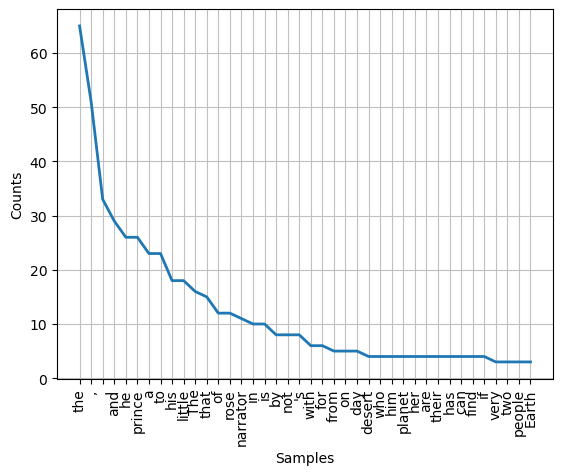

In [7]:
freqdist.plot(40, cumulative=False)
plt.show()

Per solucionar això, aplique una list comprenhension a la tokenització. Aplicarem el metode lower() per passar-ho to a minúscula, i també el isalpha() per quedar-nos amb tot alló numeric. Llavors tornarem a fer el calcul amb FreqDist.

In [8]:
tokenized_words_strip = [w.lower() for w in tokenized_words if w.isalpha()]
tokenized_words_strip_dist = FreqDist(tokenized_words_strip)
print(tokenized_words_strip)

['the', 'narrator', 'an', 'airplane', 'pilot', 'crashes', 'in', 'the', 'sahara', 'desert', 'the', 'crash', 'badly', 'damages', 'his', 'airplane', 'and', 'leaves', 'the', 'narrator', 'with', 'very', 'little', 'food', 'or', 'water', 'as', 'he', 'is', 'worrying', 'over', 'his', 'predicament', 'he', 'is', 'approached', 'by', 'the', 'little', 'prince', 'a', 'very', 'serious', 'little', 'blond', 'boy', 'who', 'asks', 'the', 'narrator', 'to', 'draw', 'him', 'a', 'sheep', 'the', 'narrator', 'obliges', 'and', 'the', 'two', 'become', 'friends', 'the', 'pilot', 'learns', 'that', 'the', 'little', 'prince', 'comes', 'from', 'a', 'small', 'planet', 'that', 'the', 'little', 'prince', 'calls', 'asteroid', 'but', 'that', 'people', 'on', 'earth', 'call', 'asteroid', 'the', 'little', 'prince', 'took', 'great', 'care', 'of', 'this', 'planet', 'preventing', 'any', 'bad', 'seeds', 'from', 'growing', 'and', 'making', 'sure', 'it', 'was', 'never', 'overrun', 'by', 'baobab', 'trees', 'one', 'day', 'a', 'myster

In [9]:
tokenized_words_strip_dist.most_common(25)

[('the', 81),
 ('and', 29),
 ('he', 28),
 ('prince', 26),
 ('a', 23),
 ('to', 23),
 ('his', 18),
 ('little', 18),
 ('that', 15),
 ('of', 12),
 ('rose', 12),
 ('narrator', 11),
 ('in', 10),
 ('is', 10),
 ('by', 8),
 ('not', 8),
 ('with', 7),
 ('on', 6),
 ('for', 6),
 ('from', 5),
 ('day', 5),
 ('desert', 4),
 ('as', 4),
 ('who', 4),
 ('him', 4)]

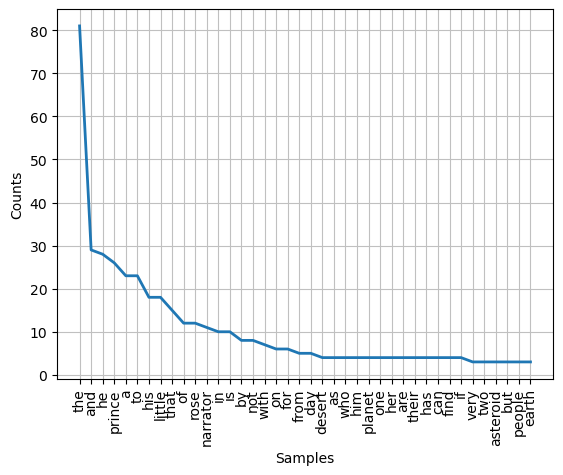

In [10]:
tokenized_words_strip_dist.plot(40, cumulative=False)
plt.show()

## Exercici 2:
Treu les stopwords i realitza stemming al teu conjunt de dades.

Per treure les stopwords utilitzarem una altra list comprenhension. Aixo es fa per eliminar paraules com articles, pronoms, abreviatures... que poden no afegir tanta informació alhora d'avaluar un text com a negatiu/positiu/neutre. Fem un cop d'ull a aquestes paraules:

In [11]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
filtered_words = [w for w in tokenized_words_strip if w not in stopwords.words('english')]
print(filtered_words)

['narrator', 'airplane', 'pilot', 'crashes', 'sahara', 'desert', 'crash', 'badly', 'damages', 'airplane', 'leaves', 'narrator', 'little', 'food', 'water', 'worrying', 'predicament', 'approached', 'little', 'prince', 'serious', 'little', 'blond', 'boy', 'asks', 'narrator', 'draw', 'sheep', 'narrator', 'obliges', 'two', 'become', 'friends', 'pilot', 'learns', 'little', 'prince', 'comes', 'small', 'planet', 'little', 'prince', 'calls', 'asteroid', 'people', 'earth', 'call', 'asteroid', 'little', 'prince', 'took', 'great', 'care', 'planet', 'preventing', 'bad', 'seeds', 'growing', 'making', 'sure', 'never', 'overrun', 'baobab', 'trees', 'one', 'day', 'mysterious', 'rose', 'sprouted', 'planet', 'little', 'prince', 'fell', 'love', 'caught', 'rose', 'lie', 'one', 'day', 'decided', 'could', 'trust', 'anymore', 'grew', 'lonely', 'decided', 'leave', 'despite', 'reconciliation', 'rose', 'prince', 'set', 'explore', 'planets', 'cure', 'loneliness', 'journeying', 'narrator', 'tells', 'us', 'little',

Pel que fa el stemming, primer instanciem amb el PorterStemmer(), i de nou amb una list comprenhension anem transformant les paraules per reduir-les a la seva arrel.

In [13]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]
print(stemmed_words)

['narrat', 'airplan', 'pilot', 'crash', 'sahara', 'desert', 'crash', 'badli', 'damag', 'airplan', 'leav', 'narrat', 'littl', 'food', 'water', 'worri', 'predica', 'approach', 'littl', 'princ', 'seriou', 'littl', 'blond', 'boy', 'ask', 'narrat', 'draw', 'sheep', 'narrat', 'oblig', 'two', 'becom', 'friend', 'pilot', 'learn', 'littl', 'princ', 'come', 'small', 'planet', 'littl', 'princ', 'call', 'asteroid', 'peopl', 'earth', 'call', 'asteroid', 'littl', 'princ', 'took', 'great', 'care', 'planet', 'prevent', 'bad', 'seed', 'grow', 'make', 'sure', 'never', 'overrun', 'baobab', 'tree', 'one', 'day', 'mysteri', 'rose', 'sprout', 'planet', 'littl', 'princ', 'fell', 'love', 'caught', 'rose', 'lie', 'one', 'day', 'decid', 'could', 'trust', 'anymor', 'grew', 'lone', 'decid', 'leav', 'despit', 'reconcili', 'rose', 'princ', 'set', 'explor', 'planet', 'cure', 'loneli', 'journey', 'narrat', 'tell', 'us', 'littl', 'princ', 'pass', 'neighbor', 'asteroid', 'encount', 'first', 'time', 'strang', 'world', '

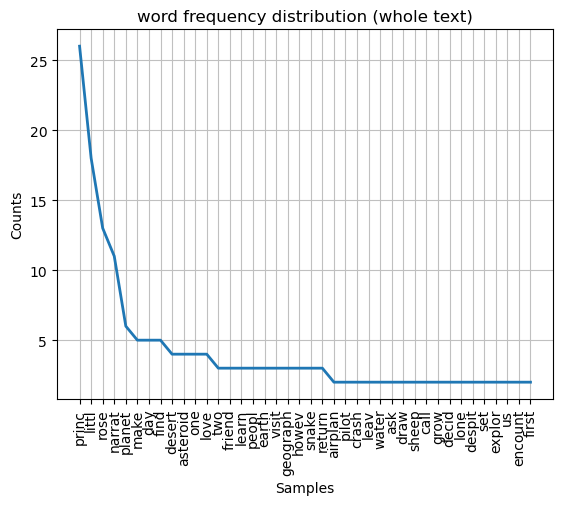

In [14]:
stemmed_words_dist = FreqDist(stemmed_words)
stemmed_words_dist.plot(40, title = 'word frequency distribution (whole text)', cumulative=False)
plt.show()

## Exercici 3:
Realitza sentiment analysis al teu conjunt de dades.

Amb el metode join posarem totes les paraules una darrera l'altra per despres passar-ho per l'analitzador de sentiment, que primer hem d'instanciar amb el SentimentIntensityAnalyzer()

In [15]:
processed_text = ' '.join(stemmed_words)
processed_text

'narrat airplan pilot crash sahara desert crash badli damag airplan leav narrat littl food water worri predica approach littl princ seriou littl blond boy ask narrat draw sheep narrat oblig two becom friend pilot learn littl princ come small planet littl princ call asteroid peopl earth call asteroid littl princ took great care planet prevent bad seed grow make sure never overrun baobab tree one day mysteri rose sprout planet littl princ fell love caught rose lie one day decid could trust anymor grew lone decid leav despit reconcili rose princ set explor planet cure loneli journey narrat tell us littl princ pass neighbor asteroid encount first time strang world first six planet littl princ visit meet king vain man drunkard businessman lamplight geograph live alon overli consum chosen occup strang behavior amus perturb littl princ understand need order peopl around admir everyth except lamplight whose dog faith admir littl princ think much adult visit learn anyth use howev learn geograph

In [16]:
sentiment_analisis = SentimentIntensityAnalyzer()
sentiment_analisis.polarity_scores(processed_text)

{'neg': 0.07, 'neu': 0.773, 'pos': 0.157, 'compound': 0.9911}

Podem observar com el resultat (compund) per aquest llibre s'acosta molt a 1, i es que és un llibre que tendeix molt a la positivitat tot i els problemes a la vida. De fet sembla una nota molt més positiva de lo que és el llibre en sí.

A continuació farem un analisi de sentiment, pero frase per frase. Per fer-ho agafarem el text original i, en lloc de per paraules, ara separarem per frases amb sent_tokenize. Després farem una funció on bàsicament repetirem el mateix procés de pretractament i de calcul de parametres de sentiment, i els graficarem frase per frase. Val a dir que el valor del sentiment que graficarem serà el 'compound'.

In [17]:
tokenized_sentences = sent_tokenize(text_little_prince)  #text into sentences
print(tokenized_sentences)

['The narrator, an airplane pilot, crashes in the Sahara desert.', 'The crash badly damages his airplane and leaves the narrator with very little food or water.', 'As he is worrying over his predicament, he is approached by the little prince, a very serious little blond boy who asks the narrator to draw him a sheep.', 'The narrator obliges, and the two become friends.', 'The pilot learns that the little prince comes from a small planet that the little prince calls Asteroid 325 but that people on Earth call Asteroid B-612.', 'The little prince took great care of this planet, preventing any bad seeds from growing and making sure it was never overrun by baobab trees.', 'One day, a mysterious rose sprouted on the planet and the little prince fell in love with it.', 'But when he caught the rose in a lie one day, he decided that he could not trust her anymore.', 'He grew lonely and decided to leave.', 'Despite a last-minute reconciliation with the rose, the prince set out to explore other pl

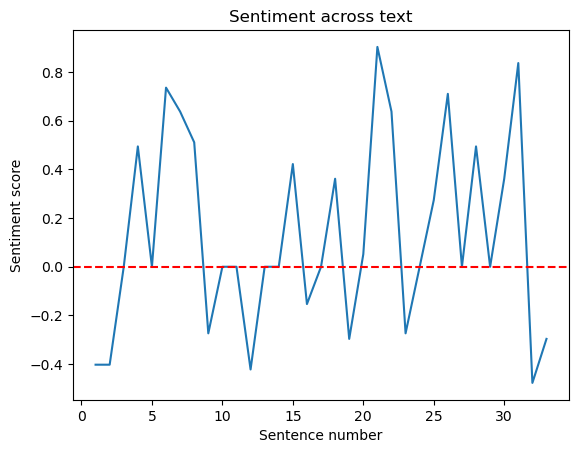

In [18]:
Sentences = []
Sent_scores = []

i=1  #initialize 1st sentence number
for s in tokenized_sentences:
    stemmer = PorterStemmer()
    sentiment_analisis_sentence = SentimentIntensityAnalyzer()
    Sentences.append(i)   # add n sentence to list
    tokenized_words_sentence = word_tokenize(s)   # separate sentence into words
    tokenized_words_sentence_strip = [w.lower() for w in tokenized_words_sentence if w.isalpha()]   # get rid of capitals & punctuation
    filtered_sentence = [w for w in tokenized_words_sentence_strip if w not in stopwords.words('english')]   # get rid of stopwords
    stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]   # stemming
    processed_sentence = ' '.join(stemmed_sentence)    # join words
    Sent_scores.append(sentiment_analisis_sentence.polarity_scores(processed_sentence)['compound'])   # calculate sentiment score
    i=i+1

plt.plot(Sentences, Sent_scores)   # plot it!
plt.axhline(y = 0, color ="red", linestyle ="--")
plt.title("Sentiment across text")
plt.xlabel("Sentence number")
plt.ylabel("Sentiment score")
plt.show()


Es pot observar com hi han molts daltavalls. El començament és molt negatiu, probablement per l'accident d'avió. La resta de frases negatives pot ser per les difícils situacions que el narrador i el protagonista van trobant.

Ara per comprobar si això és reproduible, crearem una funció (de nom 'exercici') a on farem tots els exercicis previs. Li passarem com argument algun text. Començarem amb una distopia com The road (La carretera).

In [19]:
def exercici(text):
    tokenized_words = word_tokenize(text)
    tokenized_words_strip = [w.lower() for w in tokenized_words if w.isalpha()]
    filtered_words = [w for w in tokenized_words_strip if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in filtered_words]
    stemmed_words_dist = FreqDist(stemmed_words)
    stemmed_words_dist.plot(40, title = 'word frequency distribution (whole text)', cumulative=False)
    plt.show()
    processed_text = ' '.join(stemmed_words)
    print('\nL\'analisi de sentiment per tot el text es: ')
    sentiment_analisis = SentimentIntensityAnalyzer()
    print(sentiment_analisis.polarity_scores(processed_text))

    print('\nL\'analisi de sentiment durant el text és: ')

    Sentences = []
    Sent_scores = []

    i=1
    for s in tokenized_sentences:
        #stemmer = PorterStemmer()
        #sentiment_analisis_sentence = SentimentIntensityAnalyzer()
        Sentences.append(i)
        tokenized_words_sentence = word_tokenize(s)
        tokenized_words_sentence_strip = [w.lower() for w in tokenized_words_sentence if w.isalpha()]
        filtered_sentence = [w for w in tokenized_words_sentence_strip if w not in stopwords.words('english')]
        stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]
        processed_sentence = ' '.join(stemmed_sentence)
        Sent_scores.append(sentiment_analisis_sentence.polarity_scores(processed_sentence)['compound'])
        i=i+1

    plt.plot(Sentences, Sent_scores)
    plt.axhline(y = 0, color ="red", linestyle ="--")
    plt.title("Sentiment across text")
    plt.xlabel("Sentence number")
    plt.ylabel("Sentiment score")
    plt.show()

In [20]:
text_the_road = '''A father and his young son journey on foot across the post-apocalyptic ash-covered United States some years after an extinction event. The boy's mother, pregnant with him at the time of the disaster, committed suicide some time before.

Realizing they cannot survive the winter in northern latitudes, the father takes the boy south along interstate highways towards the sea, carrying their meager possessions in their knapsacks and a supermarket cart. The father is suffering from a cough. He assures his son that they are "good guys" who are "carrying the fire". The pair have a revolver, but only two rounds. The father has tried to teach the boy to use the gun on himself if necessary, to avoid falling into the hands of cannibals.

They attempt to evade a group of marauders traveling along the road but one of the marauders discovers them and seizes the boy. The father shoots the marauder dead and they flee the marauder's companions, abandoning most of their possessions. Later, when searching a mansion for supplies, they discover a locked cellar containing people whose captors have imprisoned them alive in order to eat them limb by limb, and flee into the woods.

As they near starvation, the pair discover a concealed bunker filled with food, clothes and other supplies. They stay there for several days regaining their strength and then carry on, taking supplies with them in a cart. They encounter an old man with whom the boy insists they share food. Farther along the road they evade a group whose members include pregnant women, and soon after they discover an abandoned campsite with a newborn infant roasted on a spit. They soon run out of supplies and begin to starve before finding a house containing more food to carry in their cart, but the man's condition worsens.

The pair reach the sea, where they discover a boat that has drifted from shore. The man swims to it and recovers supplies, including a flare gun, which he demonstrates to the boy. The boy becomes ill. When they stop on the beach while the boy recovers, their cart is stolen. They pursue and confront the thief, a wretched man traveling alone. The father forces him to strip naked at gunpoint, and takes his clothes together with the cart. This distresses the boy, so the father returns and leaves the man's clothes and shoes on the road, but the man has disappeared.

While walking through a town inland, a man in a window shoots the father in the leg with an arrow. The father responds by shooting his assailant with the flare gun. The pair move further south along the beach. The father's condition worsens, and after several days he realizes he will soon die. The father tells the son he can talk to him after he is gone, and that he must continue without him. After the father dies, the boy stays with his body for three days. The boy is approached by a man carrying a shotgun. The man tells the boy he and his wife have a son and daughter. He convinces the boy he is one of the "good guys" and takes the boy under his protection.'''

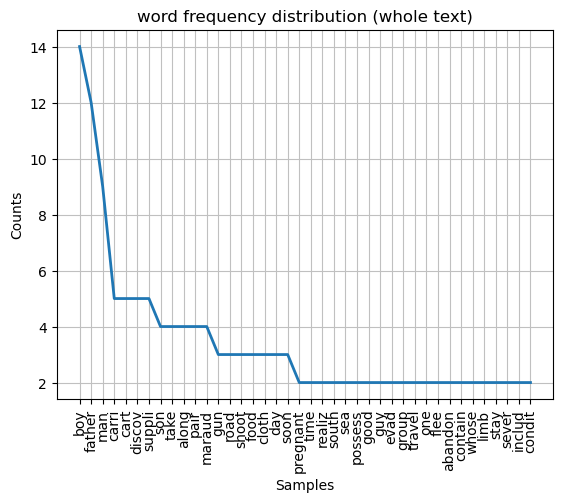


L'analisi de sentiment per tot el text es: 
{'neg': 0.199, 'neu': 0.74, 'pos': 0.062, 'compound': -0.9919}

L'analisi de sentiment durant el text és: 


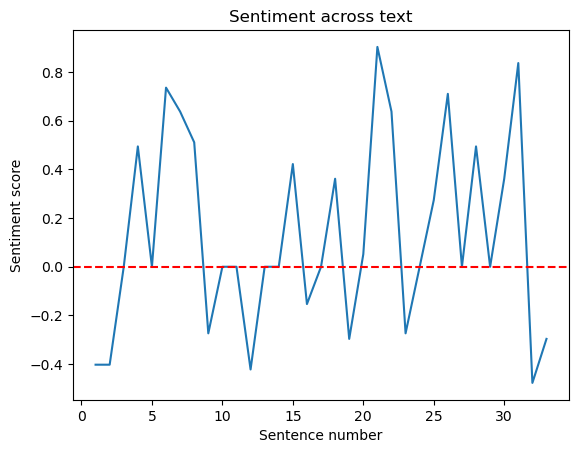

In [21]:
exercici(text_the_road)

Aqui si que es nota com la tematica del llibre influeix en el resultat. El compound es de -0.99, i es que la historia és molt dura. També és cert que acaba amb un bri d'esperança, i durant el llibre dona la impressió que pot quedar gent bona fins i tot despres d'un apocalipsi. Això només es reflecteix en que algunes frases tenen un score positiu.

També ho probarem per un llibre d'aventures (una mica agredolç) com El conde de Montrcristo.

In [22]:
text_Count_Montecristo = '''At the age of nineteen, Edmond Dantès seems to have the perfect life. He is about to become the captain of a ship, he is engaged to a beautiful and kind young woman, Mercédès, and he is well liked by almost everyone who knows him. This perfect life, however, stirs up dangerous jealousy among some of Dantès's so-called friends. Danglars, the treasurer of Dantès's ship, envies Dantès's early career success; Fernand Mondego is in love with Dantès's fiancée and so covets his amorous success; his neighbor Caderousse is simply envious that Dantès is so much luckier in life than he is.

Together, these three men draft a letter accusing Dantès of treason. There is some truth to their accusations: as a favor to his recently deceased captain, Dantès is carrying a letter from Napoleon to a group of Bonapartist sympathizers in Paris. Though Dantès himself has no political leanings, the undertaking is enough to implicate him for treason. On the day of his wedding, Dantès is arrested for his alleged crimes.

The deputy public prosecutor, Villefort, sees through the plot to frame Dantès and is prepared to set him free. At the last moment, though, Dantès jeopardizes his freedom by revealing the name of the man to whom he is supposed to deliver Napoleon's letter. The man, Noirtier, is Villefort's father. Terrified that any public knowledge of his father's treasonous activities will thwart his own ambitions, Villefort decides to send Dantès to prison for life. Despite the entreaties of Monsieur Morrel, Dantès's kind and honest boss, Dantès is sent to the infamous Château d'If, where the most dangerous political prisoners are kept.

While in prison, Dantès meets Abbé Faria, an Italian priest and intellectual, who has been jailed for his political views. Faria teaches Dantès history, science, philosophy, and languages, turning him into a well-educated man. Faria also bequeaths to Dantès a large treasure hidden on the island of Monte Cristo, and he tells him how to find it should he ever escape. When Faria dies, Dantès hides himself in the abbé's shroud, thinking that he will be buried and then dig his way out. Instead, Dantès is thrown into the sea, and is able to cut himself loose and swim to freedom.

Dantès travels to Monte Cristo and finds Faria's enormous treasure. He considers his fortune a gift from God, given to him for the sole purpose of rewarding those who have tried to help him and, more important, punishing those who have hurt him. Disguising himself as an Italian priest who answers to the name of Abbé Busoni, he travels back to Marseilles and visits Caderousse, who is now struggling to make a living as an innkeeper. From Caderousse he learns the details of the plot to frame him. In addition, Dantès learns that his father has died of grief in his absence and that Mercédès has married Fernand Mondego. Most frustrating, he learns that both Danglars and Mondego have become rich and powerful and are living happily in Paris. As a reward for this information, and for Caderousse's apparent regret over the part he played in Dantès's downfall, Dantès gives Caderousse a valuable diamond. Before leaving Marseilles, Dantès anonymously saves Morrel from financial ruin.

Ten years later, Dantès emerges in Rome, calling himself the Count of Monte Cristo. He seems to be all knowing and unstoppable. In Rome Dantès ingratiates himself to Albert de Morcerf, son of Fernand Mondego and Mercédès, by saving him from bandits. In return for the favor, Albert introduces Dantès to Parisian society. None of his old cohorts recognize the mysterious count as Edmond Dantès, though Mercédès does. Dantès is thus able to insinuate himself effortlessly into the lives of Danglars, Mondego, and Villefort. Armed with damning knowledge about each of them that he has gathered over the past decade, Dantès sets an elaborate scheme of revenge into motion.

Mondego, now known as the Count de Morcerf, is the first to be punished. Dantès exposes Morcerf's darkest secret: Morcerf made his fortune by betraying his former patron, the Greek vizier Ali Pacha, and he then sold Ali Pacha's wife and daughter into slavery. Ali Pacha's daughter, Haydée, who has lived with Dantès ever since he bought her freedom seven years earlier, testifies against Morcerf in front of the senate, irreversibly ruining his good name. Ashamed by Morcerf's treachery, Albert and Mercédès flee, leaving their tainted fortune behind. Morcerf commits suicide.

Villefort's punishment comes slowly and in several stages. Dantès first takes advantage of Madame de Villefort's murderous intent, subtly tutoring her in the uses of poison. As Madame de Villefort wreaks her havoc, killing off each member of the household in turn, Dantès plants the seeds for yet another public exposé. In court, it is revealed that Villefort is guilty of attempted infanticide, as he tried to bury his illegitimate baby while it was still alive. Believing that everyone he loves is dead and knowing that he will soon have to answer severe criminal charges, Villefort goes insane.

For his revenge on Danglars, Dantès simply plays upon his enemy's greed. He opens various false credit accounts with Danglars that cost him vast amounts of money. He also manipulates Danglars's unfaithful and dishonest wife, costing Danglars more money, and helps Danglars's daughter, Eugénie, run away with her female companion. Finally, when Danglars is nearly broke and about to flee without paying any of his creditors, Dantès has the Italian bandit Luigi Vampa kidnap him and relieve him of his remaining money. Dantès spares Danglars's life, but leaves him penniless.

Meanwhile, as these acts of vengeance play out, Dantès also tries to complete one more act of goodness. Dantès wishes to help the brave and honorable Maximilian Morrel, the son of the kind shipowner, so he hatches an elaborate plot to save Maximilian's fiancée, Valentine Villefort, from her murderous stepmother, to ensure that the couple will be truly happy forever. Dantès gives Valentine a pill that makes her appear dead and then carries her off to the island of Monte Cristo. For a month Dantès allows Maximilian to believe that Valentine is dead, which causes Maximilian to long for death himself. Dantès then reveals that Valentine is alive. Having known the depths of despair, Maximilian is now able to experience the heights of ecstasy. Dantès too ultimately finds happiness, when he allows himself to fall in love with the adoring and beautiful Haydée.
'''

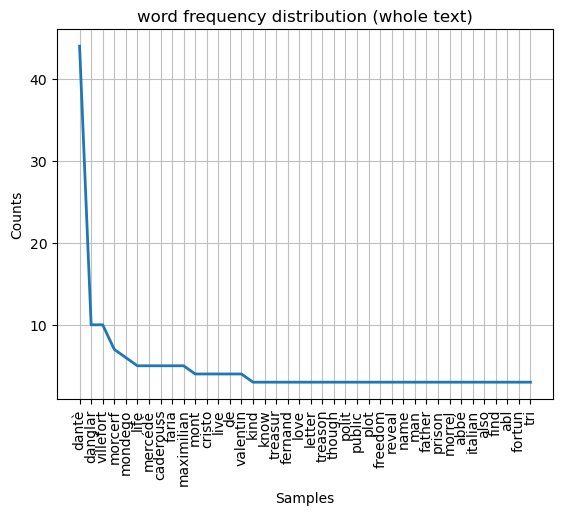


L'analisi de sentiment per tot el text es: 
{'neg': 0.162, 'neu': 0.652, 'pos': 0.185, 'compound': 0.8903}

L'analisi de sentiment durant el text és: 


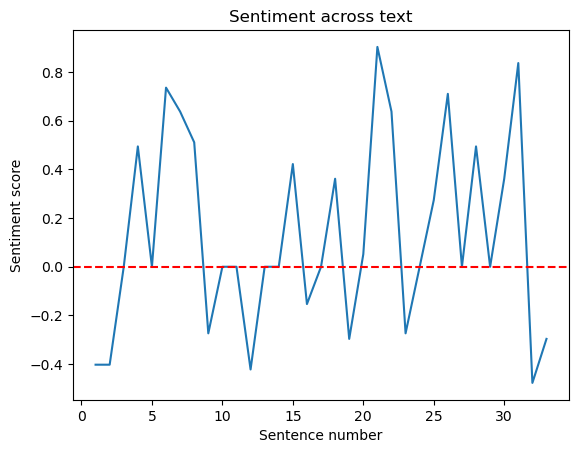

In [23]:
exercici(text_Count_Montecristo)

El score de sentiment és bastant alt (més del que esperava), i es que en el llibre es van succeint coses bones i dolentes. Això sí es reflecteix en el gràfic de scores per frase.

Ara ho probarem per un llibre bastant dramàtic com Matilda.

In [24]:
text_Matilda = '''Matilda Wormwood is a gifted girl with unpleasant parents. From a young age she can speak like an adult. Since her parents don't pay much attention to her, Matilda teaches herself to read. Before she has even been to elementary school, she has already read many books in the local library. She spends her afternoons at the library where a friendly librarian helps Matilda choose classic novels. Matilda's parents think she should read less and watch more television.

Matilda's father, Mr. Wormwood, is a dishonest car salesman. He uses several illegal tactics to trick people into buying cars that are complete junk. He regularly tries to prepare Matilda's brother, Michael, to follow him into the car salesman business. Matilda tells her father that he is dishonest, but it only makes him mad.

Matilda decides to punish her parents for the way they treat her. She hopes that it will make them less selfish and mean. She tricks her father into gluing his hat to his head, borrows a neighbor's parrot to convince the family that there is a ghost in the dining room, and swaps her father's hair tonic for dye that bleaches his hair. None of these pranks have a lasting effect on her parents, but they help train Matilda to deal with bullies.

When Matilda is old enough to go to school, she finally meets an adult who cares about her future. Her teacher, Miss Honey, is thoughtful and understanding. She quickly notices that Matilda is very smart. Miss Honey tries to get Matilda moved to a higher grade, since she can read and write better than children several years older. Miss Honey is unsuccessful because the Headmistress of the school, Miss Trunchbull, refuses and believes Miss Honey is just trying to get rid of Matilda.

Miss Trunchbull is mean and abusive to students. She grabs a student by her hair and throws the girl over a fence, just because Miss Trunchbull does not like the girl's pigtails. She also forces a student to eat an entire cake in front of all the students, hoping that it will make him sick. Matilda wants to punish Miss Trunchbull for being a bully. Matilda and another girl in her class, Lavender, become friends. Lavender is also rebellious and wants to punish Miss Trunchbull.

When Miss Trunchbull comes to teach Matilda's class, she is mean to the students and even Miss Honey, who tries to defend the students. Lavender puts a newt into Miss Trunchbull's water jug, causing her to scream and jump back. While Miss Trunchbull is yelling at the students, Matilda stares at the glass that holds the newt and uses her mind to knock it over onto Miss Trunchbull. Matilda speaks with Miss Honey about what she has done. Miss Honey has Matilda push the glass over using her mind again and is amazed at Matilda's power. They go to Miss Honey's small home to have tea and discuss Matilda's powers.

Matilda notices that Miss Honey is very poor and asks her why she cannot afford a nicer home or proper furniture. Miss Honey tells her that she was raised by a very mean aunt who took her father's home and keeps almost all of Miss Honey's money when she gets paid by the school. This makes Matilda upset, since Miss Honey has been so nice to her, and Matilda does not like bullies. Miss Honey then reveals that her aunt is Miss Trunchbull.

Matilda spends the next week practicing her mind powers and comes up with a plan. While Miss Trunchbull is teaching her class, Matilda lifts a piece of chalk and writes a message on the blackboard, making it seem as if the message is from the ghost of Miss Honey's father. Miss Trunchbull faints. After she recovers, she leaves town. Miss Honey receives a letter with her father's will that Miss Trunchbull had kept from Miss Honey. She gets ownership of her father's house and savings account. Matilda visits Miss Honey at her new house and they grow their friendship. Matilda also gets moved into a much higher grade at school and loses her mental powers, since she now has schoolwork that challenges her mind.

Matilda returns home one day to find her family frantically packing the car. Her father tells Matilda that they are moving to Spain and not coming back. Matilda runs to Miss Honey, who tells Matilda that her father is in business with criminals, and it was only a matter of time before he would flee the country. Matilda brings Miss Honey back to her house and asks her father if she can stay behind and live with Miss Honey. Matilda's father agrees and the family leaves her behind.
'''

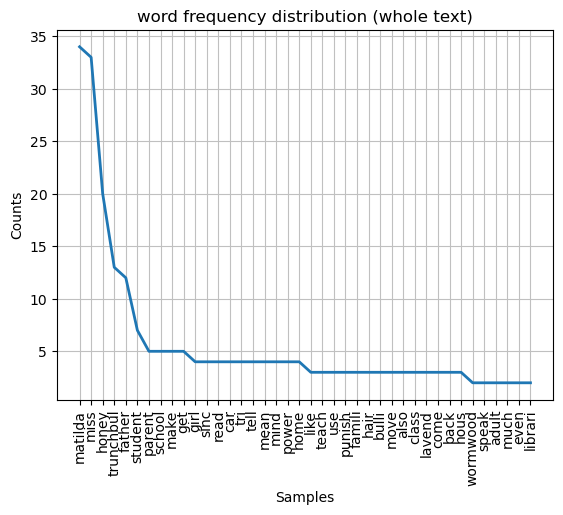


L'analisi de sentiment per tot el text es: 
{'neg': 0.193, 'neu': 0.705, 'pos': 0.102, 'compound': -0.9776}

L'analisi de sentiment durant el text és: 


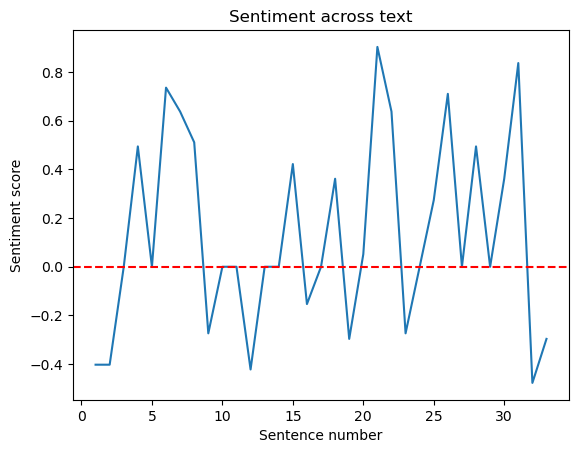

In [25]:
exercici(text_Matilda)

El score total represent molt bé el fet que el llibre és tot un drama. Hi han parts molt positives en algunes frases probablement degut al fet de que la protagonista sempre és capaç de tirar endavant malgrat tot el que passa al seu voltant.

Ara probarem amb un llibre de crim: 'Sherlock Holmes, A study in scarlett'.

In [26]:
text_Study_Scarlett = '''Part one opens in the late 1800s. Dr. John Watson, a British surgeon, gets injured in the Afghan War. Upon his return to London, he needs a new home and, after bumping into a former colleague, makes the acquaintance of Sherlock Holmes. The two men rent rooms together at 221B Baker Street. Since Watson is in ill health and doesn't go out much, he focuses on Holmes. He notices that Holmes knows a great deal about a narrow range of topics but is virtually ignorant of numerous subjects. One morning, Watson makes fun of an article about the powers of observation, only to learn that Holmes wrote the article and that he works as a consulting detective.

When Scotland Yard detective Tobias Gregson asks Holmes for help in solving a mysterious death, Watson and Holmes immediately head to the scene of the crime, a vacant house in Brixton. There they meet Gregson and another detective, Lestrade. They examine the body of a dead American named Drebber. Holmes inspects the room for clues, which he uses to determine specific details about the murderer.

Watson and Holmes leave the house and visit the constable who discovered the body. They learn that a drunk man was the only bystander. Holmes deduces that this man was actually the murderer, who had come back for the wedding ring found at the scene of the crime. Hoping to catch the murderer, Holmes places an ad in the paper for the lost ring. That night, an old woman arrives to claim the ring. Holmes follows her but loses her trail, telling Watson that she was really a young man in disguise.

The next day, news of the murder fills the paper. Watson and Holmes read that Drebber had been traveling with his secretary, Stangerson, but both men disappeared. Gregson arrives at the flat and announces that he has just arrested a man for Drebber's murder, the son of the landlady of the boardinghouse where Drebber stayed. Gregson adds that Drebber, who often drank to excess, had been thrown out of the boardinghouse for making advances on the landlady's daughter, and the son had followed him, so naturally, he must have killed Drebber.

Lestrade then arrives with his own news. Lestrade explains that he tracked Stangerson to a hotel and found him stabbed to death in his bed. When Holmes asks about Stangerson's possessions, Lestrade turns over a box that contains two pills. Using a sick dog as a test, Holmes demonstrates that one of the pills is benign and the other contains a deadly poison. Holmes explains that he knows the identity of the murderer but still needs to locate him. Moments later, a cab arrives for Holmes. When the driver comes upstairs, Holmes handcuffs him. The men foil the prisoner's escape effort and plan to take him to Scotland Yard.

Part two opens in the American West in 1847. A starving man journeys across a barren desert. He stops and sets down his bundle: a young girl. They are the only survivors of a party of twenty-one immigrants, but they have now run out of food and water. After they fall asleep, expecting to die, an enormous caravan of Mormon travelers appears. The Mormons discover the man and girl, who are John Ferrier and his adopted daughter, Lucy. The Mormon leader, Brigham Young, offers Ferrier and Lucy refuge as long as they adopt their religion.

Twelve years pass, and Ferrier and Lucy have settled outside Salt Lake City, a city built and populated by the Mormons. Ferrier owns a prosperous farm. Lucy is a beautiful young woman. She and Jefferson Hope, a miner and pioneer, fall in love, but Hope has to leave town for two months. While Hope is gone, the Mormon leader announces that Lucy must wed the son of one of the Mormon Elders, but he'll grant her one month to choose which son. Not wanting Lucy to marry a Mormon, Ferrier immediately sends a message to Hope. The same day, two young men, Drebber and Stangerson, present their case to Ferrier. They argue over who has a greater claim to Lucy, and Ferrier orders them to leave.

At the end of the month, Hope finally comes to the rescue. Ferrier and Lucy flee with him. They evade the Mormon sentries posted around Ferrier's farm and make it to the base of the mountains, where Hope has animals waiting to carry them to safety. They soon run out of food. When Hope returns from hunting, he finds the camp empty. He finds Ferrier's freshly dug grave nearby and realizes the Mormons have taken Lucy back to Salt Lake City. Vowing vengeance, Hope retraces his path and arrives at Salt Lake City the day after Lucy has been wed to Drebber. She dies a month later, and Hope visits her body, taking the wedding ring from her finger.

Hope retreats to the mountains and attempts to kill Drebber and Stangerson, but he fails and retreats to Nevada. When Hope returns five years later, Drebber and Stangerson have left the community. Hope travels around the country in search of the men. Many years later, he spots Drebber in Ohio. But Drebber reports Hope to the police as a dangerous man, and Hope is arrested. By the time Hope is set free, Drebber and Stangerson, who now works as Drebber's secretary, have fled to Europe. In time, Hope catches up with them in London.

The narrative then returns to Scotland Yard, where Hope makes a statement, explaining how he killed Drebber and Stangerson for their role in Ferrier's and Lucy's deaths. Hope explains that he picked up a drunk Drebber the night Drebber missed his train and took him to the vacant house in Brixton, where Hope revealed his identity. Hope then forced Drebber to pick one of two pills while he swallowed the other. Drebber died of poison. Hope next tried to do the same to Stangerson in Stangerson's hotel room, but he had to stab Stangerson in self-defense.

Soon after giving his statement and before he is tried for his crimes, Hope dies of a ruptured aneurysm. Later, Holmes explains to Watson how he made the deductions that led to Hope's capture. In awe, Watson suggests Holmes publish his account, but the story is already in the paper with credit given to Gregson and Lestrade.
'''

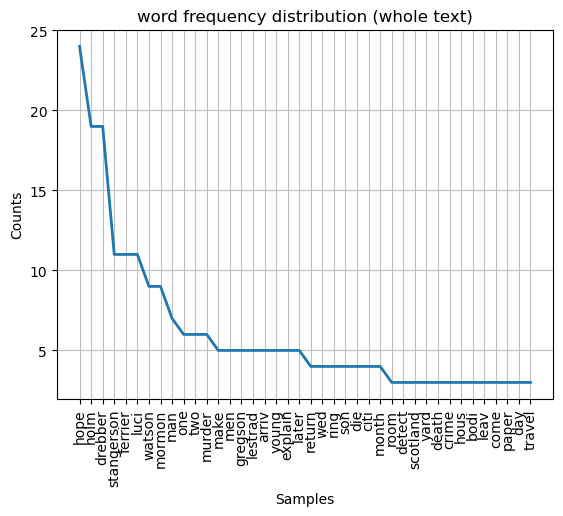


L'analisi de sentiment per tot el text es: 
{'neg': 0.186, 'neu': 0.674, 'pos': 0.141, 'compound': -0.9933}

L'analisi de sentiment durant el text és: 


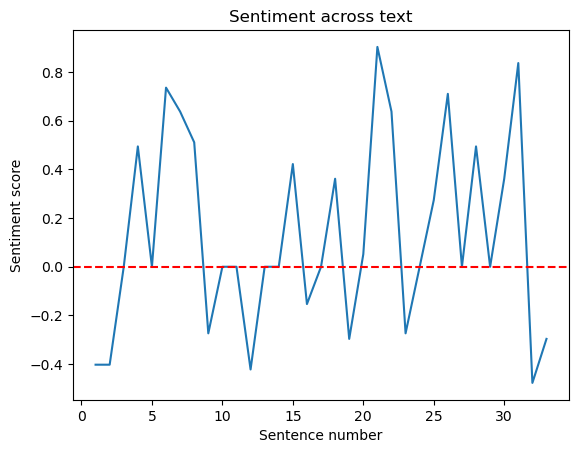

In [27]:
exercici(text_Study_Scarlett)

El score de sentiment és molt negatiu, i això que acaba bé, amb el criminal capturat i confessant. Però es que el fet de que apareguin varies vegades paraules com 'muder', 'death', 'crime' o 'body' no ajuden a obtenir un score de sentiment positiu.

## Sources:

https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

https://www.nltk.org/

https://realpython.com/nltk-nlp-python/

https://www.datacamp.com/tutorial/text-classification-python

https://towardsai.net/p/nlp/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0
